# Task 2
In task 2, we use quantum annealing to solve UD-MIS problem.
 
In quantum anealing, we propagate an easily-preparable groundstate of a Hamiltonian 
to groundstate of Hamiltonian that we want to know.   

## Preliminaries  
First of all, import all necessary packages.

In [1]:
#!/usr/bin/env julia

using Yao 
using Yao.ConstGate # needed for P1 = 0.5*(I - sigma_z) block, P1 is n_i matrix
using PyPlot

## H(t) = Ω(t) ∑_i σ_i^x - δ(t) ∑_i n_i + u ∑_ij n_i n_j

In [2]:
# const is a global variable whose values will not change. In introduction paper, u is choosed by 1.35.
# Other parameter is selected by Ref.[1] in introduction paper. 
const u = 1.35
const Ω_max = 1.89
const δ_0 = -1.0
const δ_max = 1.0

1.0

## This function makes graph that satisfy constrain for UD-MIS problem

In [3]:
function get_edges(graph::Vector{NTuple{2, Float64}}) # input data is coordinate for each vertex
    Nv = size(graph)[1] # size(graph)[1] is same as size(graph,1) = number of vertex
    edges = falses(Nv, Nv) #falses make (nv*nv) matrix that has all 0 elements. In this matrix, graph was created.
    for i in 1:(Nv-1)
        xi, yi = graph[i]
        for j in (i+1):Nv
            xj, yj = graph[j]

            dij = sqrt((xi - xj)^2. + (yi - yj)^2.)
            if dij <= 1.0
                edges[i,j] = true
            end
        end
    end
    return findall(edges) # findall give back location of vertex that have edge. findall's return value is Vector{CartesianIndex} because edges are n*n matrix.
end

get_edges (generic function with 1 method)

## Below functions make parameter that from annealing schedule.

In [4]:
function Ω(t::Float64)
    if 0 <= t <= 0.25
        return 4.0 * Ω_max * t
    elseif 0.25 < t <= 0.69
        return Ω_max
    elseif 0.69 < t <= 1
        return Ω_max - (Ω_max * (t-0.69) / 0.31) 
    end
end

function δ(t::Float64)
    if 0 <= t <= 0.25
        return δ_0
    elseif 0.25 < t <= 0.69
        return (t-0.25) * (δ_max - δ_0)/0.44 + δ_0 
    elseif 0.69 < t <= 1
        return δ_max
    end
end  

δ (generic function with 1 method)

## Below function makes Hamiltonian for UD-MIS

In [5]:
function hamiltonian(graph::Vector{NTuple{2, Float64}}, edges::Vector{CartesianIndex{2}}, t::Float64)
    # the UD-MIS Hamiltonian
    Nv = size(graph)[1] # number of vertices

    interaction_term = map(1:size(edges)[1]) do i
        l,m = edges[i][1], edges[i][2] # saving nodes that have edges.
        repeat(Nv,u*P1,(l,m)) # Yao's reapeat ftn. (Nv:number of qubit,u*P1 : gate,(l,m) : location repeated)
    end |> sum #piping
    interaction_term - δ(t)*sum(map(i->put(Nv,i=>P1), 1:Nv)) + Ω(t)*sum(map(i->put(Nv,i=>X), 1:Nv)) #put : In Yao, this ftn utilizes for inserting gate at any sites
end

hamiltonian (generic function with 1 method)

## Below functions executes QA for UD-MIS hamiltonian using TimeEvolution function at Yao.

In [6]:
function run_annealing(graph::Vector{NTuple{2, Float64}}, edges::Vector{CartesianIndex{2}}, dt::Float64)
    psi_t = zero_state(size(graph)[1])
    for t in 0:dt:1.0
        h = hamiltonian(graph, edges, t)
        psi_t = psi_t |> TimeEvolution(h, dt * 100) 
    end
    return psi_t
end

run_annealing (generic function with 1 method)

In [7]:
# Coordinates of graph
graph = [(0.3461717838632017, 1.4984640297338632), 
         (0.6316400411846113, 2.5754677320579895), 
         (1.3906262250927481, 2.164978861396621), 
         (0.66436005100802, 0.6717919819739032), 
         (0.8663329771713457, 3.3876341010035995), 
         (1.1643107343501296, 1.0823066243402013)
        ]
edges = get_edges(graph) #get graph 
dt = 0.001 

0.001

In [8]:
edges

5-element Vector{CartesianIndex{2}}:
 CartesianIndex(2, 3)
 CartesianIndex(1, 4)
 CartesianIndex(2, 5)
 CartesianIndex(1, 6)
 CartesianIndex(4, 6)

In [9]:
psi = run_annealing(graph, edges, dt)

ArrayReg{1, ComplexF64, Array...}
    active qubits: 6/6

## Result of the simulation

In the following parts, we modify and plot the result

In [10]:
n_shots = 8192
samples = measure(psi; nshots=n_shots)
@show samples

samples = BitBasis.BitStr64{6}[011100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 001100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 110101 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 110000 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 011101 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 010001 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 010001 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 011101 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 011101 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 000101 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂

₎, 011100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 110000 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 010100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 101100 ₍₂₎, 010100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 011000 ₍₂₎, 011101 ₍₂₎, 100010 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 011000 ₍₂₎, 010101 ₍₂₎, 000101 ₍₂₎, 000101 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 011101 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 0

₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 010001 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 110101 ₍₂₎, 111100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 010100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 111100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 100100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 111100 ₍₂₎, 010001 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 000101 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 010100 ₍₂₎, 011101 ₍₂₎, 111100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 011000 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 011000 ₍₂₎, 110101 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 

8192-element Vector{BitBasis.BitStr64{6}}:
 011100 ₍₂₎
 010101 ₍₂₎
 010101 ₍₂₎
 011100 ₍₂₎
 110100 ₍₂₎
 001100 ₍₂₎
 110100 ₍₂₎
 010101 ₍₂₎
 110101 ₍₂₎
 110100 ₍₂₎
 011100 ₍₂₎
 110100 ₍₂₎
 110100 ₍₂₎
          ⋮
 110100 ₍₂₎
 011100 ₍₂₎
 110100 ₍₂₎
 010101 ₍₂₎
 011100 ₍₂₎
 110000 ₍₂₎
 011100 ₍₂₎
 110100 ₍₂₎
 110100 ₍₂₎
 011100 ₍₂₎
 010101 ₍₂₎
 111100 ₍₂₎

In [11]:
# For saving results decimal number 

Save = zeros(Int64, n_shots)

8192-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [12]:
# For counting number of same results

Num = zeros(Int64, 2^size(graph)[1])

64-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [13]:
# For changing number of result into probability

Pr = zeros(2^size(graph)[1])

64-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [14]:
# Saving results in decimal number

for i in 1:n_shots
    Save[i] = Int64(samples[i])
end

In [15]:
# Counting same results

for i in 1:n_shots
    Num[Save[i] + 1] += 1
end

In [16]:
@show Num

Num = [0, 0, 0, 4, 1, 62, 0, 1, 1, 0, 4, 0, 70, 6, 0, 0, 3, 64, 0, 1, 52, 2305, 0, 0, 78, 5, 1, 0, 2309, 220, 0, 0, 3, 0, 10, 1, 55, 10, 0, 0, 0, 0, 2, 0, 7, 0, 0, 0, 55, 7, 0, 0, 2375, 239, 0, 0, 2, 0, 0, 0, 239, 0, 0, 0]


64-element Vector{Int64}:
    0
    0
    0
    4
    1
   62
    0
    1
    1
    0
    4
    0
   70
    ⋮
 2375
  239
    0
    0
    2
    0
    0
    0
  239
    0
    0
    0

In [17]:
# Confirming result

idx = 0
for i in 1:2^size(graph)[1]
    idx += Num[i]
end

In [18]:
idx

8192

In [19]:
#Counting number to probability

for i in 1:2^size(graph)[1]
    Pr[i]=Num[i]/n_shots
end

Pr

64-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.00048828125
 0.0001220703125
 0.007568359375
 0.0
 0.0001220703125
 0.0001220703125
 0.0
 0.00048828125
 0.0
 0.008544921875
 ⋮
 0.2899169921875
 0.0291748046875
 0.0
 0.0
 0.000244140625
 0.0
 0.0
 0.0
 0.0291748046875
 0.0
 0.0
 0.0

In [20]:
#Confirming result

idx = 0
for i in 1:2^size(graph)[1]
    idx += Pr[i]
end

In [21]:
idx

1.0

## Plot the result

### Convert an Integer to a String in Julia
#### string(n :: integer, base :: integer, pad :: integer)
n : integer that we want to convert, base : Binary, decimal ... , pad : the number of base number 

#### Convert a String to an Integer in Julia
### parse(type, str ; base)

In [22]:
#For indexing x-axis

x = range(0, stop = 2^size(graph)[1]-1)

0:63

In [23]:
# Decimal number to Binary string

y = string.(x, base=2, pad=6)

64-element Vector{String}:
 "000000"
 "000001"
 "000010"
 "000011"
 "000100"
 "000101"
 "000110"
 "000111"
 "001000"
 "001001"
 "001010"
 "001011"
 "001100"
 ⋮
 "110100"
 "110101"
 "110110"
 "110111"
 "111000"
 "111001"
 "111010"
 "111011"
 "111100"
 "111101"
 "111110"
 "111111"

In [24]:
# import matplotlib.pyplot as plt

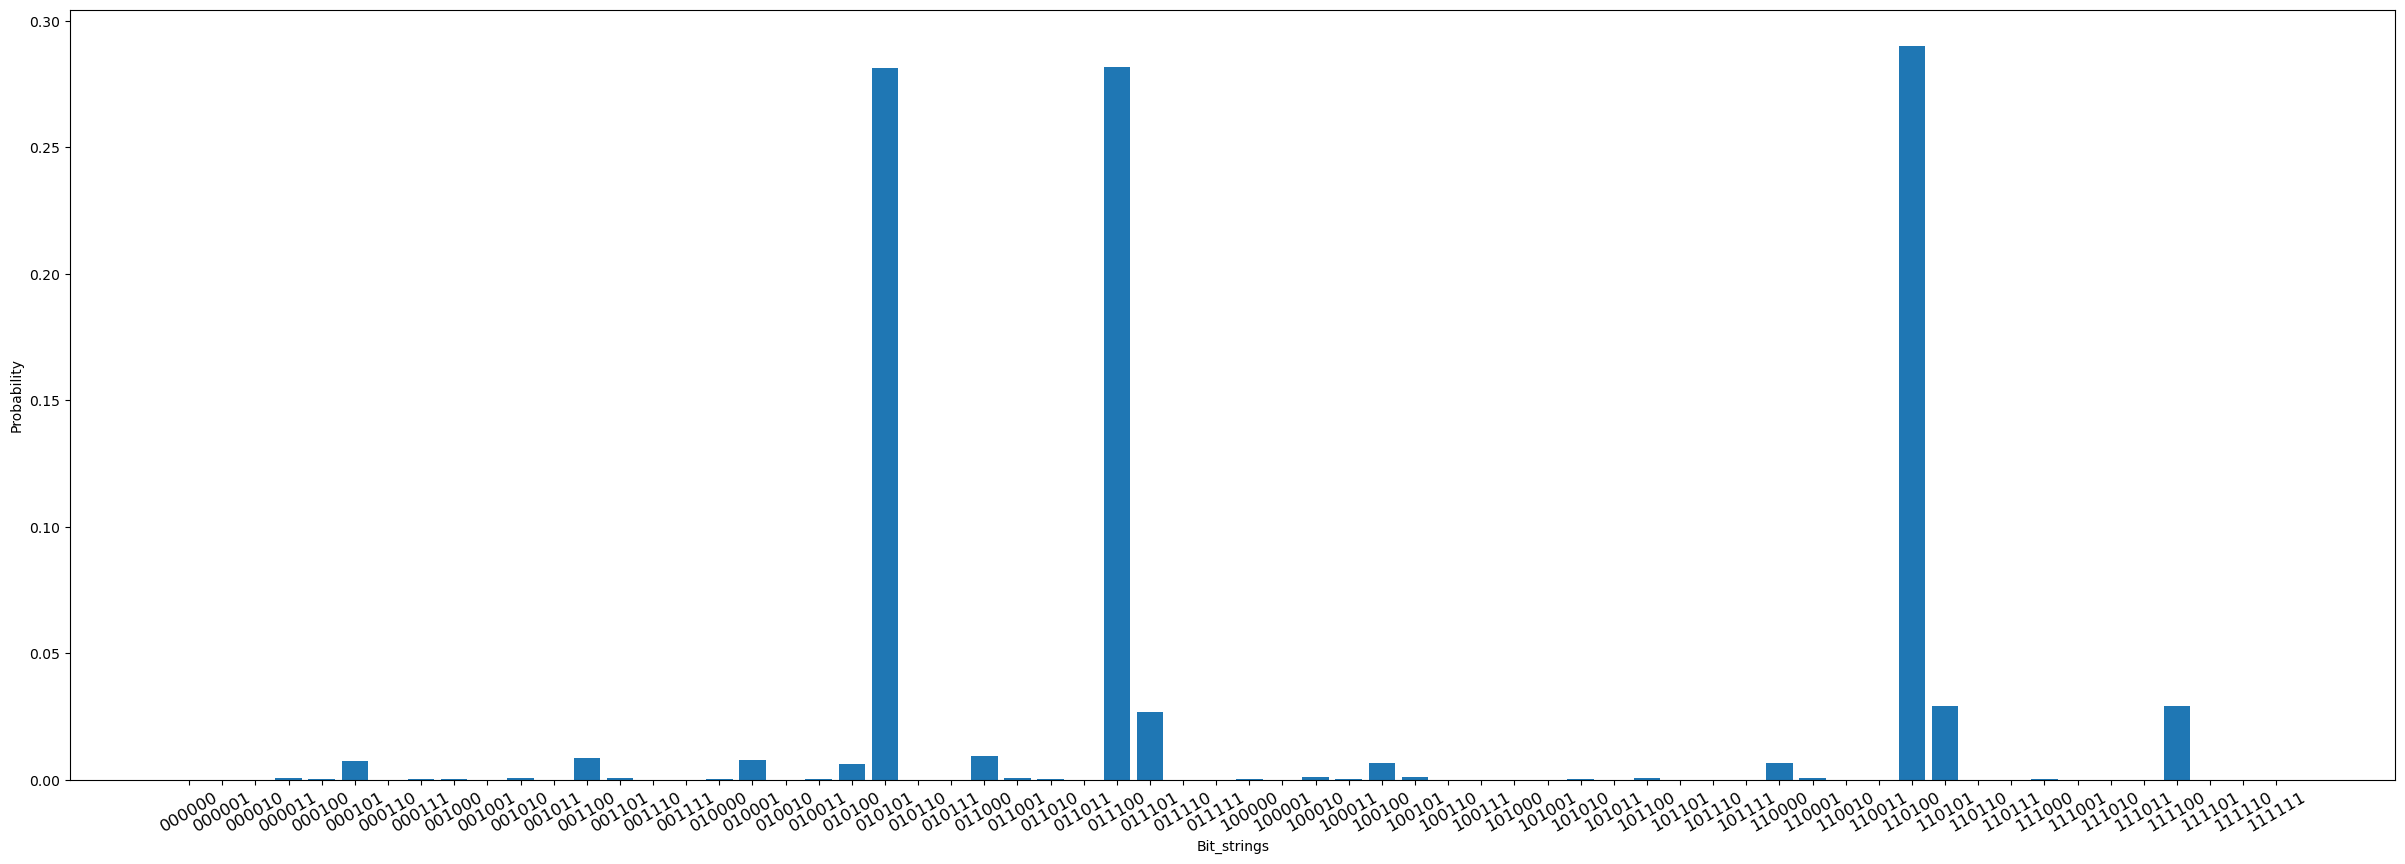

In [25]:
plt.figure(figsize=(30,10))
plt.xticks(x,y, rotation=30, fontsize = 12)
plt.xlabel("Bit_strings") 
plt.ylabel("Probability")
plt.bar(x,Pr)
plt.show()
plt.savefig("task2.png")
plt.savefig("task2.pdf")